#過剰適合

In [1]:
# 元データ（訓練データ）を入れてテストをすることは推奨されない． K(=1)近傍法を適用したときのように，過剰適合(overfit)してしまうからである．underfitもある(未学習)
# これを避けるための一番簡単な方法は，訓練データをテストデータを分けることである． train_test_split関数を使うと簡単にできる．

# 例としてBostonの住宅データの予測を行う．
# medvが住宅の価格で，他のデータ（犯罪率や人口など）から予測する．

import pandas as pd
boston = pd.read_csv('http://logopt.com/data/Boston.csv',index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
X = boston.drop("medv",axis=1) # 最後の列以外のデータを独立変数（特徴ベクトル）として抽出
y = boston.medv #最後の列(medv)を従属変数として抽出

In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #30%のデータをテスト用，それ以外を訓練用に分離

# X_trainとy_trainの中にランダムにセレクトして70%のデータが入る
# X_testとy_test中にランダムにセレクトして30%のデータが入る

In [4]:
from sklearn.linear_model import LinearRegression #クラスのインポート
reg = LinearRegression()     # 線形回帰クラスのインスタンス生成
reg.fit(X_train, y_train)    # 訓練,train用のデータを入れる
yhat = reg.predict(X_test)   # 予測,test用にする
print(reg.score(X_test,y_test)) #決定係数,test用にする

0.7442774980724477


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


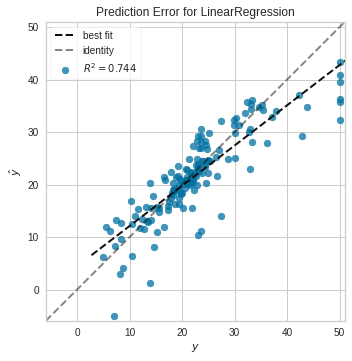

In [5]:
# 可視化
# 訓練データで訓練し，テストデータで評価する．

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(reg)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();

#誤差を見る

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


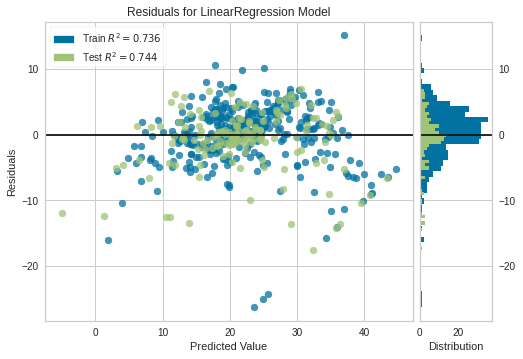

In [6]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(reg)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();

#訓練用とテスト用に分けてくれている
# Blue - train data
# Green - test data